# Imports

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
path = Path('C:/Users/jpatn/data/camvid_orig/')

In [4]:
image_path = path/'images'
label_path = path/'labels'
valid_path = path/'valid.txt'

# Original Data

In [8]:
im_fp= get_image_files(image_path)

In [7]:
lbl_fp = get_image_files(label_path)

In [12]:
def open_im(fp):
    return PIL.Image.open(fp)

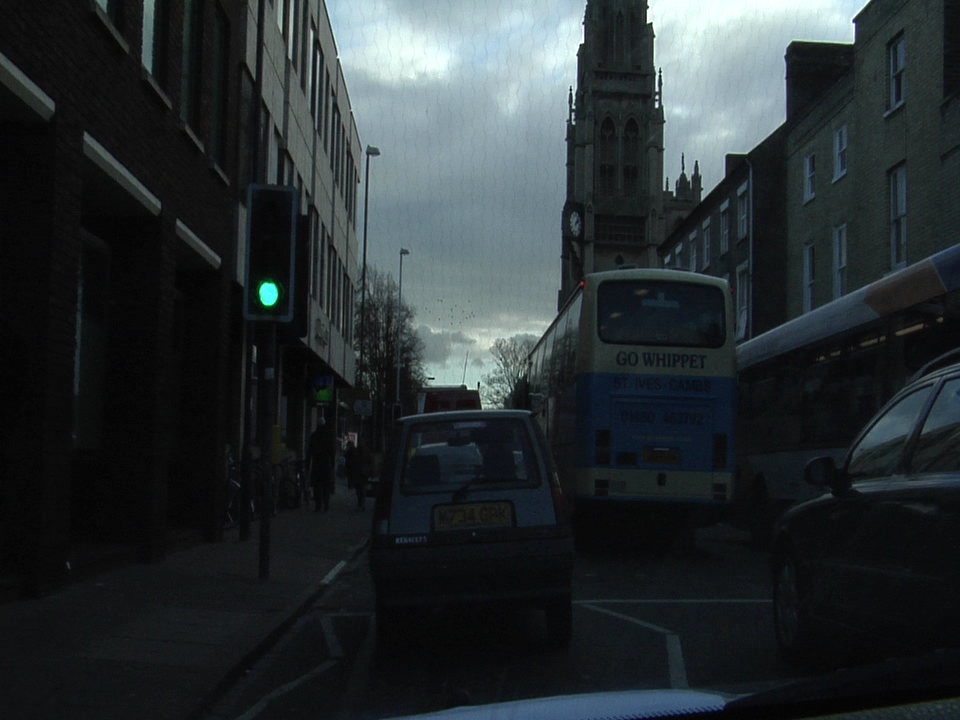

In [13]:
im1_fp = im_fp[0]
im1 = open_im(im1_fp); im1

In [14]:
get_lbl_fp = lambda x: label_path/f'{x.stem}_P{x.suffix}'

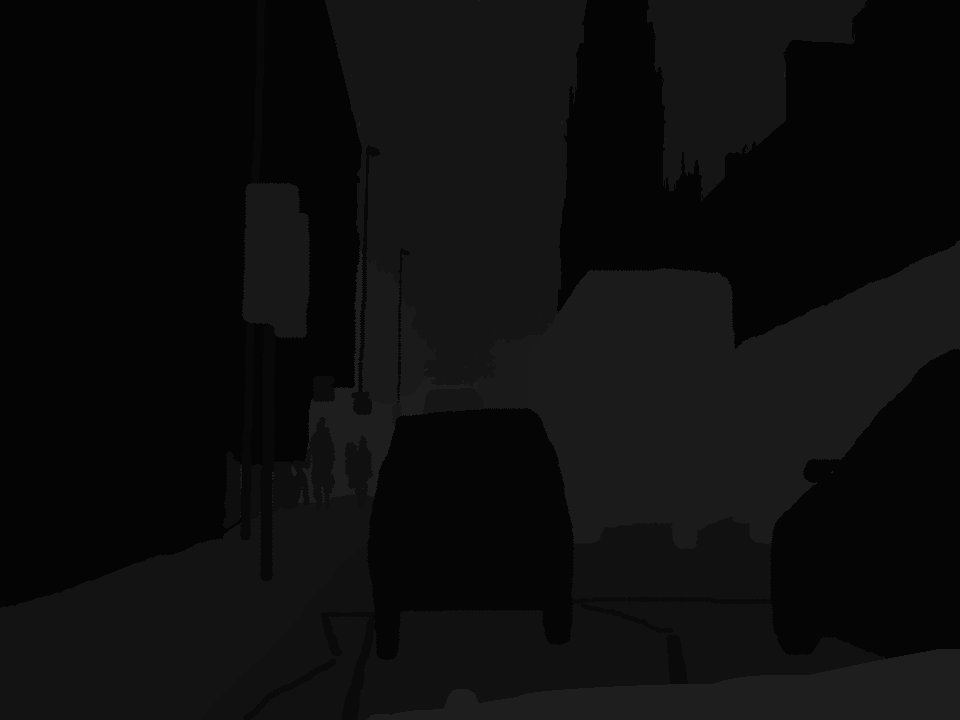

In [15]:
lbl1_fp = get_lbl_fp(im1_fp)
lbl1_im = open_im(lbl1_fp);lbl1_im

Where the labels come from:

In [16]:
np.array(lbl1_im)

array([[ 4,  4,  4,  4, ...,  4,  4,  4,  4],
       [ 4,  4,  4,  4, ...,  4,  4,  4,  4],
       [ 4,  4,  4,  4, ...,  4,  4,  4,  4],
       [ 4,  4,  4,  4, ...,  4,  4,  4,  4],
       ...,
       [19, 19, 19, 19, ..., 30, 30, 30, 30],
       [19, 19, 19, 19, ..., 30, 30, 30, 30],
       [19, 19, 19, 19, ..., 30, 30, 30, 30],
       [19, 19, 19, 19, ..., 30, 30, 30, 30]], dtype=uint8)

Label opened as mask:

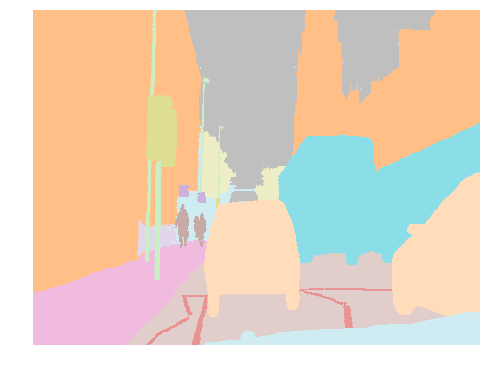

In [17]:
lbl1_msk = open_mask(lbl1_fp)
lbl1_msk.show(figsize=(8,8))

# Converting Data

In [18]:
orig_codes = np.loadtxt(path/'codes.txt',dtype=str);orig_codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car', 'CartLuggagePram', 'Child', 'Column_Pole',
       'Fence', 'LaneMkgsDriv', 'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving', 'ParkingBlock',
       'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk', 'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel', 'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

In [38]:
new_codes = ['Building', 'Car', 'Cyclist', 'Fence', 'Pedestrian', 'Pole', 'Road', 'Sidewalk', 
             'Sign', 'Sky', 'Vegetation', 'Void']

In [20]:
maps = [(4,1,31,3),(5,14,25,22,27),(2,13),(9,),(16,7,0,6),(8,23),(17,10,11,28),(19,18,15),(20,24,12),(21,),(29,26),(30,)]

In [21]:
rev_maps = {c:i for i,m in enumerate(maps) for c in m}

In [22]:
def map_codes(c):
    for k,v in rev_maps.items():
        if c==k: return v

In [23]:
map_codes(31)

0

In [24]:
def lbl_from_imp(im_path):
    return open_im(get_lbl_fp(im_path))

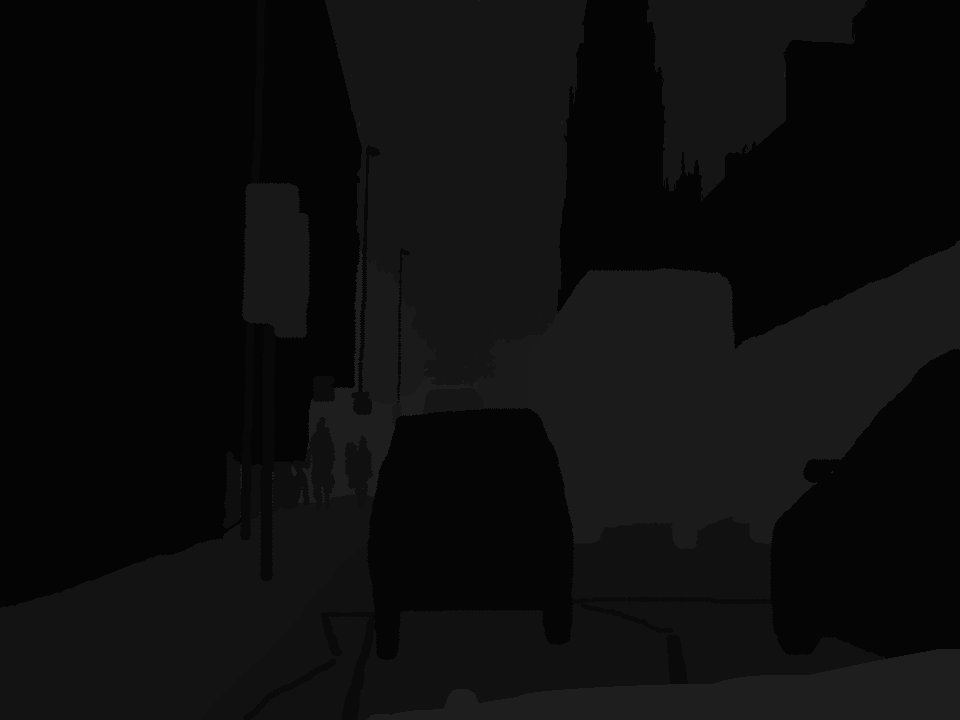

In [25]:
lbl_from_imp(im1_fp)

In [26]:
def lbl_array(im):
    return np.array(im) 

In [27]:
lbl1_arr = lbl_array(lbl1_im)
lbl1_arr

array([[ 4,  4,  4,  4, ...,  4,  4,  4,  4],
       [ 4,  4,  4,  4, ...,  4,  4,  4,  4],
       [ 4,  4,  4,  4, ...,  4,  4,  4,  4],
       [ 4,  4,  4,  4, ...,  4,  4,  4,  4],
       ...,
       [19, 19, 19, 19, ..., 30, 30, 30, 30],
       [19, 19, 19, 19, ..., 30, 30, 30, 30],
       [19, 19, 19, 19, ..., 30, 30, 30, 30],
       [19, 19, 19, 19, ..., 30, 30, 30, 30]], dtype=uint8)

In [28]:
def convert_arr(arr):
    v = np.vectorize(map_codes)
    return v(arr)

In [29]:
convert_arr(lbl1_arr)

array([[ 0,  0,  0,  0, ...,  0,  0,  0,  0],
       [ 0,  0,  0,  0, ...,  0,  0,  0,  0],
       [ 0,  0,  0,  0, ...,  0,  0,  0,  0],
       [ 0,  0,  0,  0, ...,  0,  0,  0,  0],
       ...,
       [ 7,  7,  7,  7, ..., 11, 11, 11, 11],
       [ 7,  7,  7,  7, ..., 11, 11, 11, 11],
       [ 7,  7,  7,  7, ..., 11, 11, 11, 11],
       [ 7,  7,  7,  7, ..., 11, 11, 11, 11]])

In [30]:
def arr_to_lbl(arr):
    new_arr = np.asarray(arr,dtype=np.uint8)
    return PIL.Image.fromarray(new_arr,'L')

New label with classes converted:

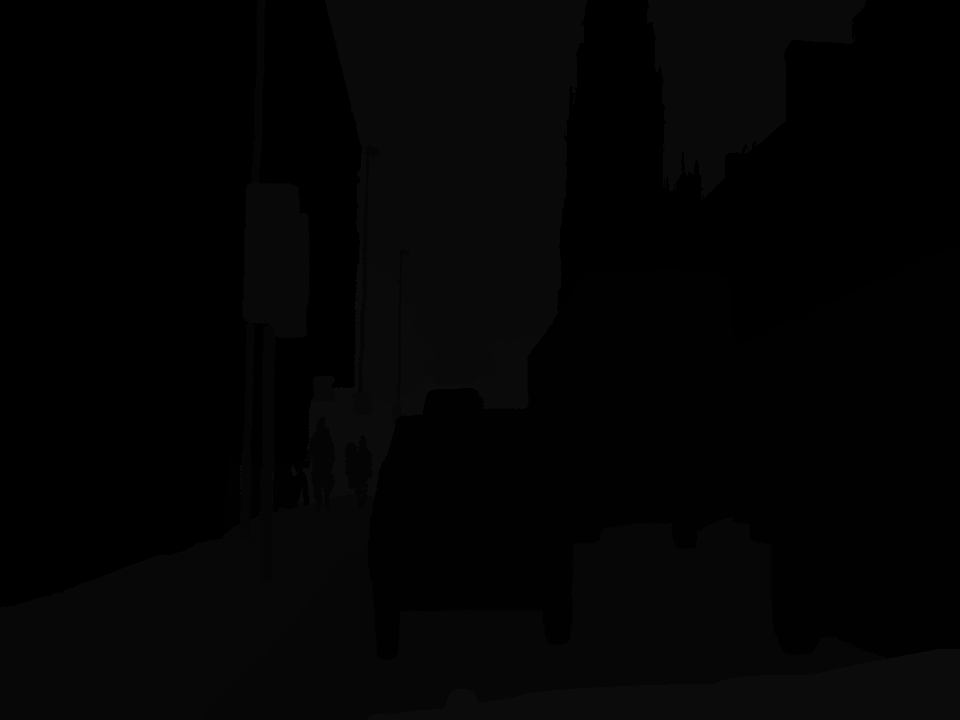

In [31]:
arr_to_lbl(convert_arr(lbl1_arr))

Convert all labels:

In [32]:
def get_new_labels(im_path):
    lbl = lbl_from_imp(im_path)
    arr = lbl_array(lbl)
    new_arr = convert_arr(arr)
    new_lbl = arr_to_lbl(new_arr)
    return new_lbl.save(get_lbl_fp(im_path))

In [33]:
for im in im_fp:
    get_new_labels(im)

# New Data

In [34]:
new_lbls = path/'labels'

New label:

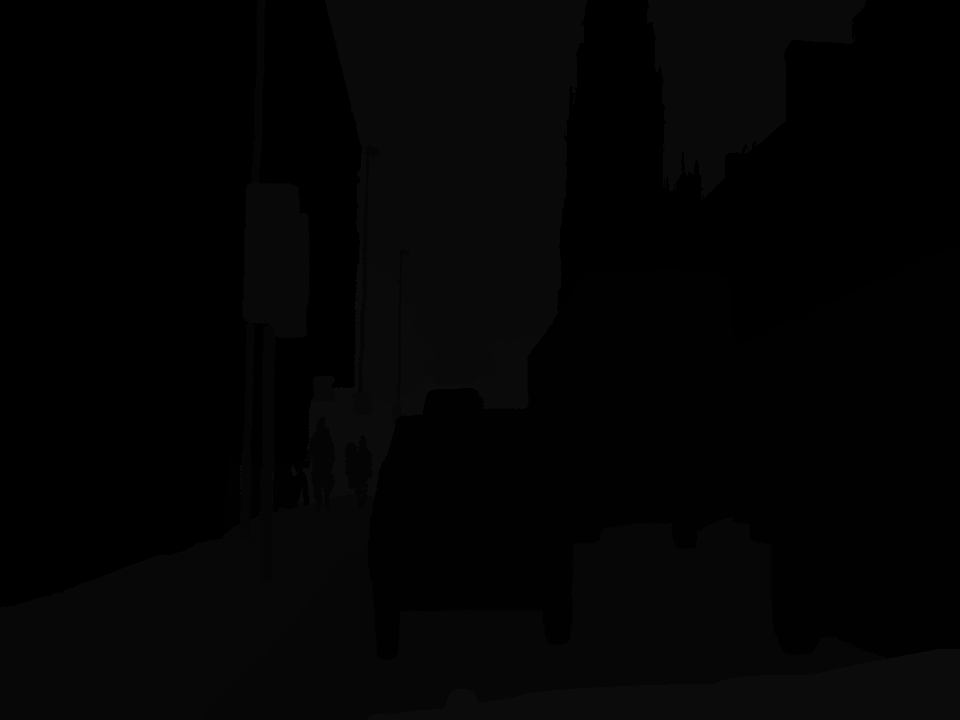

In [35]:
new_lbl1_fp = get_lbl_fp(im1_fp)
new_lbl1 = open_im(new_lbl1_fp)
new_lbl1

Labels:

In [36]:
lbl_array(new_lbl1)

array([[ 0,  0,  0,  0, ...,  0,  0,  0,  0],
       [ 0,  0,  0,  0, ...,  0,  0,  0,  0],
       [ 0,  0,  0,  0, ...,  0,  0,  0,  0],
       [ 0,  0,  0,  0, ...,  0,  0,  0,  0],
       ...,
       [ 7,  7,  7,  7, ..., 11, 11, 11, 11],
       [ 7,  7,  7,  7, ..., 11, 11, 11, 11],
       [ 7,  7,  7,  7, ..., 11, 11, 11, 11],
       [ 7,  7,  7,  7, ..., 11, 11, 11, 11]], dtype=uint8)

Label opened as mask:

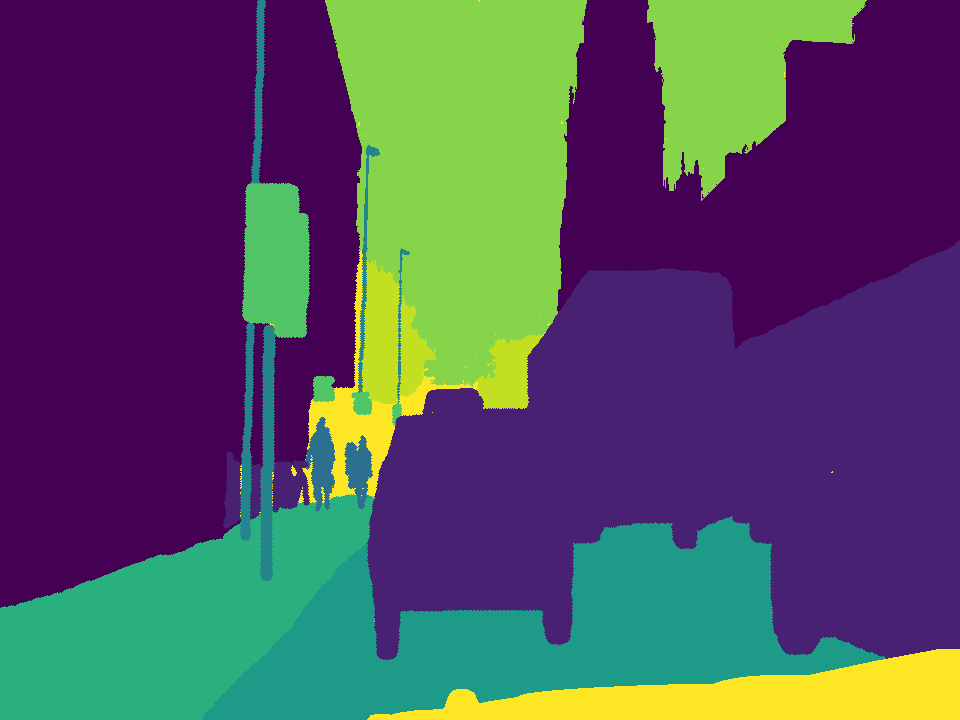

In [37]:
new_msk = open_mask(new_lbl1_fp)
new_msk

# End